## Lending club and national climate data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
data_statement_path = "D:/archive (8)/LCDataDictionary.xlsx"

data_dict = pd.read_excel(data_statement_path)

data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [3]:
#Feature의 개수는 151개 
data_dict.sample

<bound method NDFrame.sample of                LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
148      settlement_amount  The loan amount that the borrower has agreed t...
149  settlement_percentage  The settlement amount as a percentage of the p...
150        settlement_term  The number of months that the borrower will be...
151                    NaN                                                NaN
152                    NaN  * Employer Title replaces Employer Name for al...

[153 rows x 2 columns]>

In [4]:
data_path = "D:/archive (8)/Loan_status_2007-2020Q3.gzip"
loan_data = pd.read_csv(data_path, low_memory=False)

# 데이터 확인
print(loan_data.head())  # 상위 5개 행 출력
print(loan_data.info())  # 데이터 정보 출력


   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                    

In [5]:
# Observing some general information about the dataset
display(loan_data.sample(3),loan_data.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    Unnamed: 0                                  2925493 non-null  int64  
 1    id                                          2925493 non-null  object 
 2    loan_amnt                                   2925492 non-null  float64
 3    funded_amnt                                 2925492 non-null  float64
 4    funded_amnt_inv                             2925492 non-null  float64
 5    term                                        2925492 non-null  object 
 6    int_rate                                    2925492 non-null  object 
 7    installment                                 2925492 non-null  float64
 8    grade                                       2925492 non-null  object 
 9    sub_grade                                   

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
2090793,223032,55248396,10500.0,10500.0,10500.0,36 months,11.53%,346.40,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1733871,12827,168178923,8500.0,8500.0,8500.0,60 months,8.81%,175.67,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1262750,48628,157775350,21000.0,21000.0,21000.0,36 months,17.74%,756.47,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


None

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [7]:
loan_data['loan_status'].value_counts()

data = loan_data.copy()
dataset = loan_data.copy()

## Data Analysis
- dataset을 바탕으로 각각의 feature들에 대한 정보, Missing value, outlier 분석해보기
- 각각의 value값들 비율 확인해보기

In [8]:
#Unnamed: 0 feature drop
dataset = dataset.drop(columns='Unnamed: 0')
dataset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
## Missing value 비율
missing_ratios = dataset.isnull().sum()/len(dataset)*100

print("Missing value ratio")
print(missing_ratios[missing_ratios>0].sort_values(ascending=False).head(20))

Missing value ratio
hardship_loan_status                          95.097886
hardship_reason                               95.090332
hardship_status                               95.090229
hardship_dpd                                  95.090161
payment_plan_start_date                       95.090127
hardship_start_date                           95.090127
hardship_end_date                             95.090127
deferral_term                                 95.090127
hardship_length                               95.090127
hardship_type                                 95.090127
orig_projected_additional_accrued_interest    93.873169
hardship_payoff_balance_amount                93.776228
hardship_amount                               93.776228
hardship_last_payment_amount                  93.776228
sec_app_revol_util                            93.348574
verification_status_joint                     93.341738
revol_bal_joint                               93.237960
sec_app_collections_12_mths_

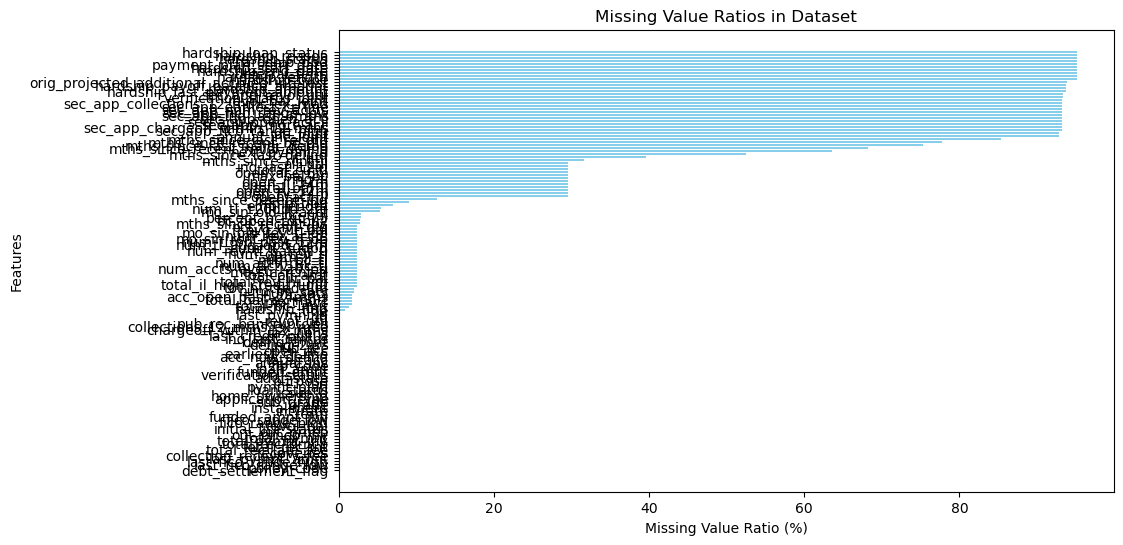

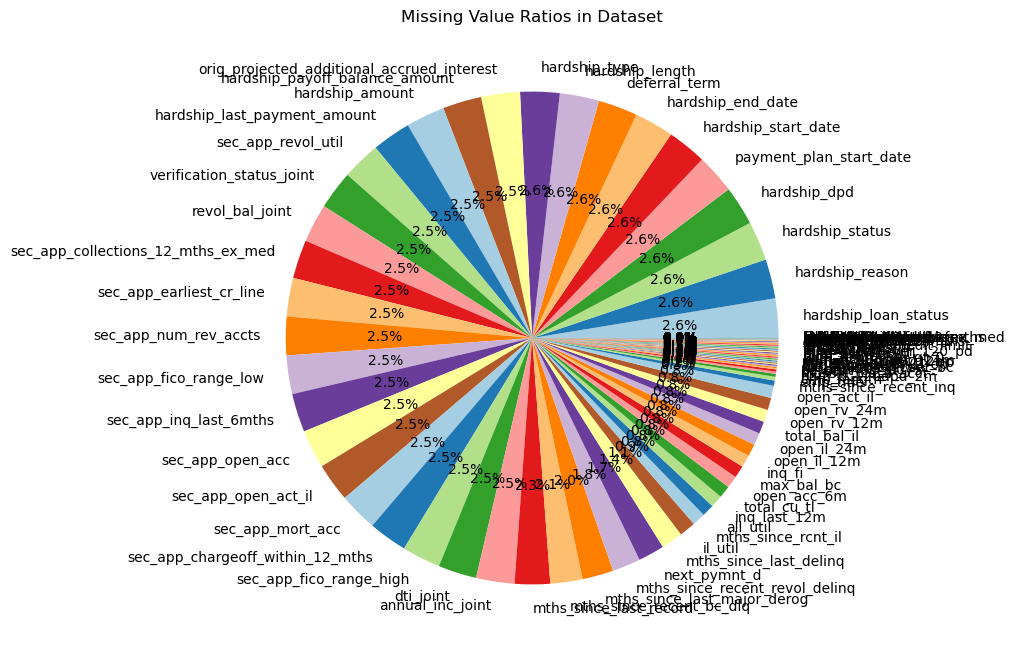

In [10]:
##전체적인 missing value

# 각 feature의 결측치 비율 계산
missing_ratios = dataset.isnull().sum() / len(dataset) * 100

# 결측치가 있는 feature만 필터링하여 정렬
missing_ratios = missing_ratios[missing_ratios > 0].sort_values(ascending=False)

# Bar Chart (막대 그래프)
plt.figure(figsize=(10, 6))
plt.barh(missing_ratios.index, missing_ratios, color='skyblue')
plt.xlabel("Missing Value Ratio (%)")
plt.ylabel("Features")
plt.title("Missing Value Ratios in Dataset")
plt.gca().invert_yaxis()  # y축 뒤집기 (비율이 높은 순서대로 보기 좋게)
plt.show()

# Pie Chart (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(missing_ratios, labels=missing_ratios.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Missing Value Ratios in Dataset")
plt.show()


In [13]:
## missing value가 80퍼센트가 넘는 feature들 뽑기 
high_missing_features = missing_ratios[missing_ratios>80]

print(f"The number of features that have missing value ratio more than 80% : {len(high_missing_features)}")
print(high_missing_features)

The number of features that have missing value ratio more than 80% : 30
hardship_loan_status                          95.097886
hardship_reason                               95.090332
hardship_status                               95.090229
hardship_dpd                                  95.090161
payment_plan_start_date                       95.090127
hardship_start_date                           95.090127
hardship_end_date                             95.090127
deferral_term                                 95.090127
hardship_length                               95.090127
hardship_type                                 95.090127
orig_projected_additional_accrued_interest    93.873169
hardship_payoff_balance_amount                93.776228
hardship_amount                               93.776228
hardship_last_payment_amount                  93.776228
sec_app_revol_util                            93.348574
verification_status_joint                     93.341738
revol_bal_joint                 

In [14]:
#대출자가 경제적인 어려움을 가질 때 대출 현황
dataset["hardship_loan_status"].value_counts()

hardship_loan_status
ACTIVE                116333
GRACE_CURRENT          11647
Late (16-30 days)       4371
INCOLLECTION            3538
In Grace Period         2632
Current                 2271
DELINQUENT              1451
CURRENT                  721
Late (31-120 days)       419
Issued                    13
PIPELINE                   7
OTHER                      5
ISSUED                     2
CLOSED                     1
Name: count, dtype: int64

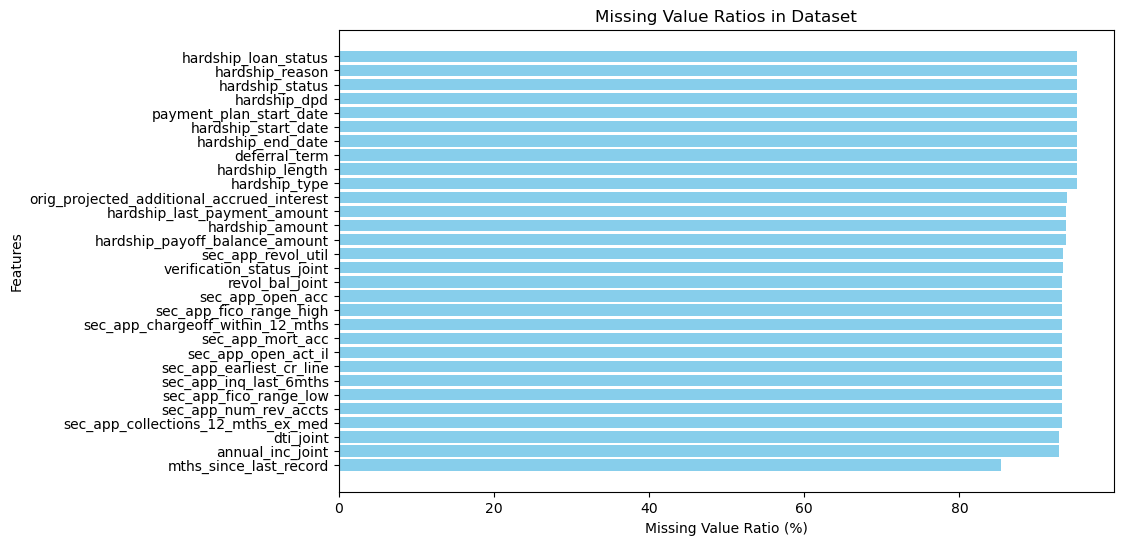

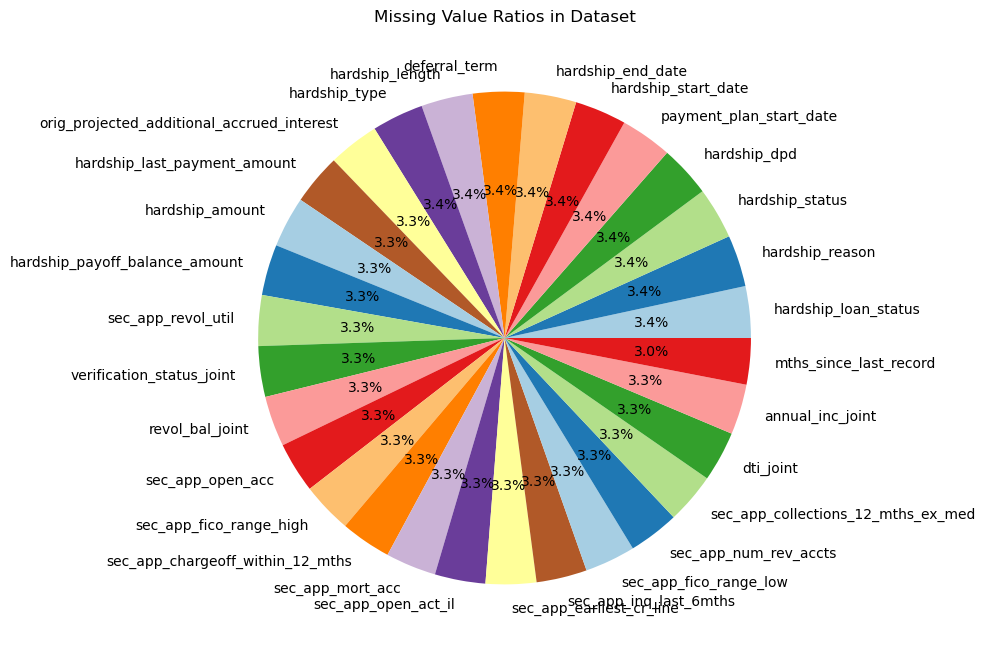

In [15]:
## 상위 20개만 추린다
top_20_missing_ratios = missing_ratios[missing_ratios>0].sort_values(ascending=False).head(30)

# Bar Chart (막대 그래프)
plt.figure(figsize=(10, 6))
plt.barh(top_20_missing_ratios.index, top_20_missing_ratios, color='skyblue')
plt.xlabel("Missing Value Ratio (%)")
plt.ylabel("Features")
plt.title("Missing Value Ratios in Dataset")
plt.gca().invert_yaxis()  # y축 뒤집기 (비율이 높은 순서대로 보기 좋게)
plt.show()

# Pie Chart (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(top_20_missing_ratios, labels=top_20_missing_ratios.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Missing Value Ratios in Dataset")
plt.show()

In [ ]:
"""##Outlier를 찾는다. 각각 10개의 features씩 Boxplot을 하고 subplot을 14개 보여줄 수 있는 그림

# 숫자형 컬럼만 선택 (Outlier 분석 대상)
numerical_columns = dataset.select_dtypes(include=[np.number]).columns

# subplot 개수 및 feature 그룹 설정
num_features_per_plot = 10  # 한 subplot에 10개의 feature 포함
num_subplots = 14           # 총 14개의 subplot 생성

# Figure 및 subplot 생성
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, num_subplots * 4))

# 각 subplot에 Boxplot 추가
for i in range(num_subplots):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    selected_features = numerical_columns[start_idx:end_idx]
    
    if len(selected_features) == 0:
        break  # 더 이상 feature가 없으면 중단

    dataset[selected_features].boxplot(ax=axes[i])
    axes[i].set_title(f'Boxplot of Features {start_idx + 1} to {end_idx}')
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()
"""

In [16]:
## 동일 ID 있는 지 Check
duplicated_ids = dataset[dataset.duplicated(subset=['id'], keep=False)]

if not duplicated_ids.empty:
    print(duplicated_ids)
else:
    print("There is no duplicated ids")

There is no duplicated ids


## Data Class 나누기
- Fully Paid : 1497783
- Default(Charged Off + Default) : 362981

In [17]:
#loan_data 특정 class만 살리고 Charged off -> Defalut class로 바꾸기기
data = data[data['loan_status'].isin(["Fully Paid", "Charged Off", "Default"])]
print(data['loan_status'].value_counts())

data['loan_status'] = data['loan_status'].replace("Charged Off", "Default")
print('\n',data['loan_status'].value_counts())

loan_status
Fully Paid     1497783
Charged Off     362548
Default            433
Name: count, dtype: int64

 loan_status
Fully Paid    1497783
Default        362981
Name: count, dtype: int64


In [18]:
for col in data.columns:
    print(col, '\n', data[col].unique(), '\n')

Unnamed: 0 
 [     0      1      2 ... 421092 421093 421094] 

id 
 ['1077501' '1077430' '1077175' ... '102628603' '102196576' '99799684'] 

loan_amnt 
 [ 5000.  2500.  2400. ... 37950. 38525. 38550.] 

funded_amnt 
 [ 5000.  2500.  2400. ... 37950. 38525. 38550.] 

funded_amnt_inv 
 [ 4975.          2500.          2400.         ... 31496.16546498
 21595.18110536  9982.00356554] 

term 
 [' 36 months' ' 60 months'] 

int_rate 
 [' 10.65%' ' 15.27%' ' 15.96%' ' 13.49%' ' 12.69%' '  7.90%' ' 18.64%'
 ' 21.28%' ' 14.65%' '  9.91%' ' 16.29%' '  6.03%' ' 11.71%' ' 12.42%'
 ' 14.27%' ' 16.77%' '  7.51%' '  8.90%' ' 18.25%' '  6.62%' ' 19.91%'
 ' 17.27%' ' 17.58%' ' 21.67%' ' 19.42%' ' 22.06%' ' 20.89%' ' 20.30%'
 ' 23.91%' ' 19.03%' ' 23.52%' ' 23.13%' ' 22.74%' ' 22.35%' ' 24.11%'
 '  6.00%' ' 22.11%' '  7.49%' ' 11.99%' '  5.99%' ' 10.99%' '  9.99%'
 ' 18.79%' ' 11.49%' '  8.49%' ' 15.99%' ' 16.49%' '  6.99%' ' 12.99%'
 ' 15.23%' ' 14.79%' '  5.42%' ' 10.59%' ' 17.49%' ' 15.62%' ' 21.36%'
